# Fig 7: posterior over temperatures
Results are the same as in my MSc thesis. This means that they were created with delfi, and they are on a different lobster.

In [5]:
%load_ext autoreload
%autoreload 2

In [51]:
import numpy as np
import importlib
import matplotlib as mpl
import matplotlib.pylab as plt
import time
from copy import deepcopy

import sys
sys.path.append("../model/")
sys.path.append('../../')
sys.path.append('../../simulator')

from common import col, svg, samples_nd, get_labels_8pt

from sbi_prior import create_prior, create_prior_general
from sbi_wrapper import simulate, simulate_general, load_setup, get_time, stats
from process_samples import merge_samples
import viz
# import viz_samples_thesis
# import viz_samples
# import train_utils as tu
# import startEndUtils as seu


In [7]:
PANEL_A1 = 'svg/panel_a1.svg'
PANEL_A2 = 'svg/panel_a2.svg'
PANEL_A3 = 'svg/panel_a3.svg'
PANEL_A4 = 'svg/panel_a4.svg'
PANEL_A5 = 'svg/panel_a5.svg'

PANEL_B1 = 'svg/panel_b1.svg'
PANEL_B2 = 'svg/panel_b2.svg'
PANEL_B3 = 'svg/panel_b3.svg'
PANEL_B4 = 'svg/panel_b4.svg'
PANEL_B5 = 'svg/panel_b5.svg'

PANEL_C1 = 'svg/panel_c1.svg'
PANEL_C2 = 'svg/panel_c2.svg'
PANEL_C3 = 'svg/panel_c3.svg'
PANEL_C4 = 'svg/panel_c4.svg'
PANEL_C5 = 'svg/panel_c5.svg'

PANEL_D1 = 'svg/panel_d1.svg'
PANEL_D2 = 'svg/panel_d2.svg'
PANEL_D3 = 'svg/panel_d3.svg'
PANEL_D4 = 'svg/panel_d4.svg'
PANEL_D5 = 'svg/panel_d5.svg'

PANEL_X1 = 'svg/panel_x1.svg'
PANEL_X2 = 'svg/panel_x2.svg'
PANEL_X3 = 'svg/panel_x3.svg'

#PANEL_C2 = 'svg/panel_c2.svg'
#PANEL_C3 = 'svg/panel_c3.svg'
#PANEL_C4 = 'svg/panel_c4.svg'

PANEL_suppA = 'svg/panel_supp_a.svg'

In [8]:
prior = create_prior(log=True)
dimensions_11 = 31
lims_11 = np.asarray([-np.sqrt(3)*np.ones(dimensions_11), np.sqrt(3)*np.ones(dimensions_11)]).T 
dimensions_15 = 46
lims_15 = np.asarray([-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15)]).T

In [9]:
samples_MAF_11 = merge_samples("../../results/temperature/samples_delfi_MSc/R1_11deg", name='conductance_params')
samples_MAF_11 = np.reshape(samples_MAF_11, (10*2520, 31))

samples_MAF_15 = merge_samples("../../results/temperature/samples_delfi_MSc/R2_15deg", name='conductance_params')
samples_MAF_15 = np.reshape(samples_MAF_15, (10*2520, 46))

samples_MAF_19 = merge_samples("../../results/temperature/samples_delfi_MSc/R3_19deg", name='conductance_params')
samples_MAF_19 = np.reshape(samples_MAF_19, (10*2520, 46))

samples_MAF_23 = merge_samples("../../results/temperature/samples_delfi_MSc/R4_23deg", name='conductance_params')
samples_MAF_23 = np.reshape(samples_MAF_23, (10*2520, 46))

samples_MAF_27 = merge_samples("../../results/temperature/samples_delfi_MSc/R5_27deg", name='conductance_params')
samples_MAF_27 = np.reshape(samples_MAF_27, (10*2520, 46))

### Load data

In [10]:
prior = create_prior(log=True)
params_mean = prior.mean.numpy()
params_std = prior.stddev.numpy()

In [11]:
# import train_utils as tu

summstats_experimental_11 = np.load('../../results/temperature/experimental_data/857_016_summstats/ss_857_016_0049_11.npz')['summ_stats']
summstats_experimental_15 = np.load('../../results/temperature/experimental_data/857_016_summstats/ss_857_016_0056_15.npz')['summ_stats']
summstats_experimental_19 = np.load('../../results/temperature/experimental_data/857_016_summstats/ss_857_016_0059_19.npz')['summ_stats']
summstats_experimental_23 = np.load('../../results/temperature/experimental_data/857_016_summstats/ss_857_016_0063_23.npz')['summ_stats']
summstats_experimental_27 = np.load('../../results/temperature/experimental_data/857_016_summstats/ss_857_016_0069_27.npz')['summ_stats']

In [12]:
# posterior_MAF_11 = inf_SNPE_MAF_11.predict([summstats_experimental_11])
# posterior_MAF_15 = inf_SNPE_MAF_15.predict([summstats_experimental_15])
# posterior_MAF_19 = inf_SNPE_MAF_19.predict([summstats_experimental_19])
# posterior_MAF_23 = inf_SNPE_MAF_23.predict([summstats_experimental_23])
# posterior_MAF_27 = inf_SNPE_MAF_27.predict([summstats_experimental_27])

# Panel A: Traces to infer

### 11 degree

In [13]:
npz = np.load('../../results/temperature/experimental_data/857_016_traces/data_857_016_0049.npz')
t_11 = npz['t']
PD_spikes_11 = npz['PD_spikes']
LP_spikes_11 = npz['LP_spikes']
PY_spikes_11 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

dt = t_11[1] - t_11[0]

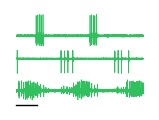

In [14]:
counter = 0

start_index = 100000
end_index   = 130000
height_offset = 200

with mpl.rc_context(fname='../../.matplotlibrc'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_11[:end_index-start_index], 5+2.5+pdn[:end_index-start_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_11[:end_index-start_index], 5+1.45+lpn[:end_index-start_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_11[:end_index-start_index], 5+pyn[:end_index-start_index]/1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #plt.plot(t_11[:end_index-start_index], 2.5+PD_spikes_11[:end_index-start_index], c=col['GT'])
    #plt.plot(t_11[:end_index-start_index], 1.25+LP_spikes_11[:end_index-start_index], c=col['GT'])
    #plt.plot(t_11[:end_index-start_index], PY_spikes_11[:end_index-start_index], c=col['GT'])

    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    #ax.set_xlabel('seconds')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t_11[0], t_11[number_of_timesteps-1], 2)
    
    ax.plot(t_scale, 4.3 * np.ones_like(t_scale), c='k', lw=1.0)

#     plt.savefig(PANEL_A1, facecolor='None', transparent=True)

    plt.show()

### 15 degree

In [15]:
npz = np.load('../../results/temperature/experimental_data/857_016_traces/data_857_016_0056.npz')
t_15 = npz['t']
PD_spikes_15 = npz['PD_spikes']
LP_spikes_15 = npz['LP_spikes']
PY_spikes_15 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

dt = t_15[1] - t_15[0]

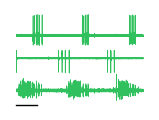

In [16]:
counter = 0

start_index = 60000
end_index   = 90000
height_offset = 200

with mpl.rc_context(fname='../../.matplotlibrc'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_15[:end_index-start_index], 5+2.5+pdn[start_index:end_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_15[:end_index-start_index], 5+1.45+lpn[start_index:end_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_15[:end_index-start_index], 5+pyn[start_index:end_index]/1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #plt.plot(t_15[:end_index-start_index], 2.5+PD_spikes_15[start_index:end_index], c=col['GT'])
    #plt.plot(t_15[:end_index-start_index], 1.25+LP_spikes_15[start_index:end_index], c=col['GT'])
    #plt.plot(t_15[:end_index-start_index], PY_spikes_15[start_index:end_index], c=col['GT'])

    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t_15[0], t_15[number_of_timesteps-1], 2)
    
    ax.plot(t_scale, 4.3 * np.ones_like(t_scale), c='k', lw=1.0)

#     plt.savefig(PANEL_A2, facecolor='None', transparent=True)

    plt.show()

# 19 degree

In [17]:
npz = np.load('../../results/temperature/experimental_data/857_016_traces/data_857_016_0059.npz')
t_19 = npz['t']
PD_spikes_19 = npz['PD_spikes']
LP_spikes_19 = npz['LP_spikes']
PY_spikes_19 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

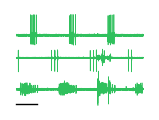

In [18]:
counter = 0

start_index = 100000
end_index   = 130000
height_offset = 200

with mpl.rc_context(fname='../../.matplotlibrc'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_19[:end_index-start_index], 5+2.5+pdn[:end_index-start_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_19[:end_index-start_index], 5+1.45+lpn[:end_index-start_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_19[:end_index-start_index], 5+pyn[:end_index-start_index]/1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #plt.plot(t_19[:end_index-start_index], 2.5+PD_spikes_19[:end_index-start_index], c=col['GT'])
    #plt.plot(t_19[:end_index-start_index], 1.25+LP_spikes_19[:end_index-start_index], c=col['GT'])
    #plt.plot(t_19[:end_index-start_index], PY_spikes_19[:end_index-start_index], c=col['GT'])

    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t_15[0], t_15[number_of_timesteps-1], 2)
    
    ax.plot(t_scale, 4.3 * np.ones_like(t_scale), c='k', lw=1.0)

#     plt.savefig(PANEL_A3, facecolor='None', transparent=True)

    plt.show()

### 23 degree

In [19]:
npz = np.load('../../results/temperature/experimental_data/857_016_traces/data_857_016_0063.npz')
t_23 = npz['t']
PD_spikes_23 = npz['PD_spikes']
LP_spikes_23 = npz['LP_spikes']
PY_spikes_23 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

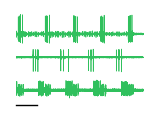

In [20]:
counter = 0

start_index = 100000
end_index   = 130000
height_offset = 200

with mpl.rc_context(fname='../../.matplotlibrc'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_23[:end_index-start_index], 5+2.5+pdn[:end_index-start_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_23[:end_index-start_index], 5+1.45+lpn[:end_index-start_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_23[:end_index-start_index], 5+pyn[:end_index-start_index]/1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #plt.plot(t_23[:end_index-start_index], 2.5+PD_spikes_23[:end_index-start_index], c=col['GT'])
    #plt.plot(t_23[:end_index-start_index], 1.25+LP_spikes_23[:end_index-start_index], c=col['GT'])
    #plt.plot(t_23[:end_index-start_index], PY_spikes_23[:end_index-start_index], c=col['GT'])

    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t_15[0], t_15[number_of_timesteps-1], 2)
    
    ax.plot(t_scale, 4.3 * np.ones_like(t_scale), c='k', lw=1.0)

#     plt.savefig(PANEL_A4, facecolor='None', transparent=True)

    plt.show()

### 27 degree

In [21]:
npz = np.load('../../results/temperature/experimental_data/857_016_traces/data_857_016_0069.npz')
t_27 = npz['t']
PD_spikes_27 = npz['PD_spikes']
LP_spikes_27 = npz['LP_spikes']
PY_spikes_27 = npz['PY_spikes']

pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

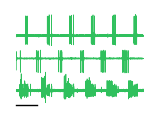

In [22]:
counter = 0

start_index = 100000
end_index   = 130000
height_offset = 200

with mpl.rc_context(fname='../../.matplotlibrc'):
    
    fig, ax = plt.subplots(1, 1, figsize=(1.8,1.3))

    ax.plot(t_27[:end_index-start_index], 5+2.5+pdn[:end_index-start_index]/np.max(pdn), c=col['GT'], lw=0.5)
    ax.plot(t_27[:end_index-start_index], 5+1.45+lpn[:end_index-start_index]/2.5/np.max(lpn), c=col['GT'], lw=0.5)
    ax.plot(t_27[:end_index-start_index], 5+pyn[:end_index-start_index]/1.2/np.max(pyn), c=col['GT'], lw=0.5)
    
    #plt.plot(t_27[:end_index-start_index], 2.5+PD_spikes_27[:end_index-start_index], c=col['GT'])
    #plt.plot(t_27[:end_index-start_index], 1.25+LP_spikes_27[:end_index-start_index], c=col['GT'])
    #plt.plot(t_27[:end_index-start_index], PY_spikes_27[:end_index-start_index], c=col['GT'])

    #ax.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t_15[0], t_15[number_of_timesteps-1], 2)
    
    ax.plot(t_scale, 4.3 * np.ones_like(t_scale), c='k', lw=1.0)

#     plt.savefig(PANEL_A5, facecolor='None', transparent=True)

    plt.show()

# Panel B: Posteriors

In [23]:
labels_ = get_labels_8pt()
labels_[9] += ''

In [24]:
from decimal import Decimal
all_labels = []
lims=lims_11
params_std_11 = params_std
params_mean_11 = params_mean
for dim_i in range(31):
    if dim_i > len(params_mean_11) - 7.5: # synapses
        if dim_i == 24: all_labels.append([r'$\mathdefault{0.01}$        ', r'$\mathdefault{10000}\;\;\;\;$   '])
        else: all_labels.append([r'$\mathdefault{0.01}$   ', r'$\mathdefault{1000}\;\;\;\;$ '])
    else: # membrane conductances
        num_after_digits = -int(np.log10(lims[dim_i, 1] * params_std[dim_i] + params_mean[dim_i]))
        if num_after_digits > 2:
            num_after_digits=2
        labels = [round(Decimal((lims[dim_i, num_tmp] * params_std[dim_i] + params_mean[dim_i]) / 0.628e-3), num_after_digits)
                  for num_tmp in range(2)]
        new_labels = []
        counter=0
        for l in labels:
            if counter == 0:
                new_labels.append(r'$\mathdefault{'+str(l)+'}$       ')
            else:
                new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$    ')
            counter+=1
        all_labels.append(new_labels)

In [25]:
labels_ = viz.get_labels_8pt_supp()
new_labels = []
for l in labels_:
    if counter > 0: new_labels.append(l+'    ')
labels_ = new_labels

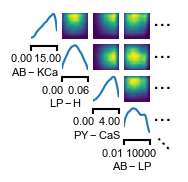

In [26]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, axes = samples_nd(samples=[samples_MAF_11],
                           subset=[4, 14, 18, 24],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.09,17.0*0.09),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           tick_labelpad =1,
                           labelpad=1,
                           upper=['kde'],
                           hist_offdiag={'bins':50})
#     plt.savefig(PANEL_B1, facecolor='None', transparent=True)

    plt.show()

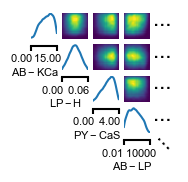

In [27]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, axes = samples_nd(samples=[samples_MAF_15],
                           subset=[4, 14, 18, 24],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.09,17.0*0.09),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           tick_labelpad =1,
                           labelpad=1,
                           hist_offdiag={'bins':50})
                           #plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]}),
#     plt.savefig(PANEL_B2, facecolor='None', transparent=True)

    plt.show()

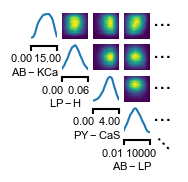

In [28]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, axes = samples_nd(samples=[samples_MAF_19],
                           subset=[4, 14, 18, 24],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.09,17.0*0.09),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           tick_labelpad = 1,
                           labelpad=1,
                           hist_offdiag={'bins':50})
#     plt.savefig(PANEL_B3, facecolor='None', transparent=True)

    plt.show()

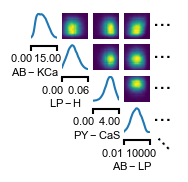

In [29]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, axes = samples_nd(samples=[samples_MAF_23],
                           subset=[4, 14, 18, 24],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.09,17.0*0.09),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           tick_labelpad = 1,
                           labelpad=1,
                           hist_offdiag={'bins':50})
#     plt.savefig(PANEL_B4, facecolor='None', transparent=True)

    plt.show()

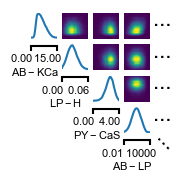

In [30]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, axes = samples_nd(samples=[samples_MAF_27],
                           subset=[4, 14, 18, 24],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.09,17.0*0.09),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           diag=['kde'],
                           upper=['kde'],
                           tick_labelpad = 1,
                           labelpad=1,
                           hist_offdiag={'bins':50})
#     plt.savefig(PANEL_B5, facecolor='None', transparent=True)

    plt.show()

# Panel C: samples from posterior

In [31]:
hyperparams = load_setup('collect_samples_15deg_46D')

In [32]:
prior_15 = create_prior_general(hyperparams, log=True)
dimensions_15 = 46
lims_15 = np.asarray([-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15)]).T

# labels_ = viz.get_labels()
# prior_normalized = dd.Uniform(-np.sqrt(3)*np.ones(dimensions_15), np.sqrt(3)*np.ones(dimensions_15), seed=params_15.seed)

# params_11 = deepcopy(params_15)

params_mean_15 = prior_15.mean.numpy()
params_std_15 = prior_15.stddev.numpy()

### 11 degree

In [57]:
hyperparams['model_params']['temp'] = 283

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


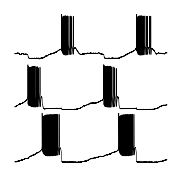

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


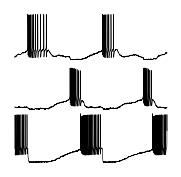

In [59]:
num_samples = 2
time_len = int(30000 * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
counter = 0
    
for counter in range(num_samples):
    params1 = samples_MAF_27[2+counter]
    target_params = params1 * params_std_15 + params_mean_15
    out_target = simulate_general(deepcopy(target_params), hyperparams, seed=418011) # params.true_params gives the synaptic strengths #  165000
    ss = stats(out_target)
    
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    ax = viz.vis_sample_plain(out_target, get_time(), ax, time_len=time_len, offset=20000, col='k')
#     if counter == 0: plt.savefig(PANEL_C1, facecolor='None', transparent=True)
#     if counter == 1: plt.savefig(PANEL_D1, facecolor='None', transparent=True)
    plt.show()

In [101]:
hyperparams['model_params']['temp'] = 287

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


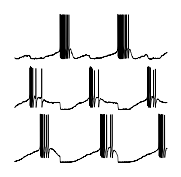

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


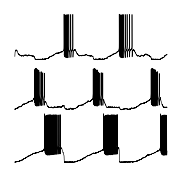

In [102]:
num_samples = 2
time_len = int((end_index-start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
    
for counter in range(num_samples):
    params1 = samples_MAF_27[2+counter]
    if counter == 0: params1 = np.load('../model/parameter_set_used_for_fig6_in_msc_thesis.npz')['params1']
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = simulate_general(deepcopy(target_params), hyperparams, seed=418011) # params.true_params gives the synaptic strengths #  165000
    ss = stats(out_target)
    
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    ax = viz.vis_sample_plain(out_target, get_time(), ax, time_len=time_len, offset=30000, col='k')
#     if counter == 0: plt.savefig(PANEL_C2, facecolor='None', transparent=True)
#     if counter == 1: plt.savefig(PANEL_D2, facecolor='None', transparent=True)
    plt.show()

In [103]:
hyperparams['model_params']['temp'] = 291

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


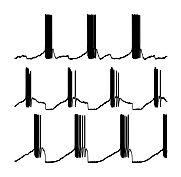

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


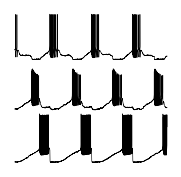

In [104]:
num_samples = 2
time_len = int((end_index-start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
    
for counter in range(num_samples):
    params1 = samples_MAF_27[2+counter]
    if counter == 0: params1 = np.load('../model/parameter_set_used_for_fig6_in_msc_thesis.npz')['params1']
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = simulate_general(deepcopy(target_params), hyperparams, seed=418011) # params.true_params gives the synaptic strengths #  165000
    
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    ax = viz.vis_sample_plain(out_target, get_time(), ax, time_len=time_len, offset=20000, col='k')
#     if counter == 0: plt.savefig(PANEL_C2, facecolor='None', transparent=True)
#     if counter == 1: plt.savefig(PANEL_D2, facecolor='None', transparent=True)
    plt.show()

In [105]:
hyperparams['model_params']['temp'] = 295

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


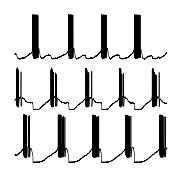

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


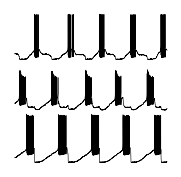

In [106]:
num_samples = 2
time_len = int((end_index-start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
    
for counter in range(num_samples):
    params1 = samples_MAF_27[2+counter]
    if counter == 0: params1 = np.load('../model/parameter_set_used_for_fig6_in_msc_thesis.npz')['params1']
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = simulate_general(deepcopy(target_params), hyperparams, seed=418011) # params.true_params gives the synaptic strengths #  165000
#     ss = summ_stats_11.calc([out_target])[0]
#     print('ss', ss)
    
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    ax = viz.vis_sample_plain(out_target, get_time(), ax, time_len=time_len, offset=20000, col='k')
#     if counter == 0: plt.savefig(PANEL_C2, facecolor='None', transparent=True)
#     if counter == 1: plt.savefig(PANEL_D2, facecolor='None', transparent=True)
    plt.show()

In [107]:
hyperparams['model_params']['temp'] = 299

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


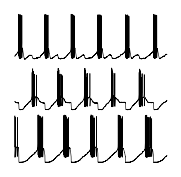

/Users/deismic/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


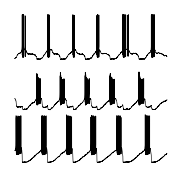

In [108]:
num_samples = 2
time_len = int((end_index-start_index) * (t_15[1]- t_15[0]) / 0.025/1e-3)

show_xaxis = False
    
for counter in range(num_samples):
    params1 = samples_MAF_27[2+counter]
    if counter == 0: params1 = np.load('../model/parameter_set_used_for_fig6_in_msc_thesis.npz')['params1']
    
    target_params = params1 * params_std_15 + params_mean_15
    out_target = simulate_general(deepcopy(target_params), hyperparams, seed=418011) # params.true_params gives the synaptic strengths #  165000
    
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    ax = viz.vis_sample_plain(out_target, get_time(), ax, time_len=time_len, offset=20000, col='k')
#     if counter == 0: plt.savefig(PANEL_C2, facecolor='None', transparent=True)
#     if counter == 1: plt.savefig(PANEL_D2, facecolor='None', transparent=True)
    plt.show()

# Panel d

In [109]:
all_ss = np.load('../../results/temperature/five_posterior_samples_along_T/samplesAlongTemperature.npz')['all_ss']
num_samples = 10
temp_vec = np.arange(283,300)

In [110]:
all_ss_reshape = np.reshape(all_ss, (num_samples, int(len(all_ss)/num_samples), 19))

In [111]:
all_exp_cycles = np.asarray([summstats_experimental_11[0], summstats_experimental_15[0], summstats_experimental_19[0], summstats_experimental_23[0], summstats_experimental_27[0]])
all_exp_freqs = 1/all_exp_cycles*1000

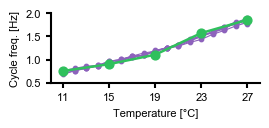

In [113]:
figsize = (2.7,0.9)
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for ss in all_ss_reshape[:-5]:
        all_cycles = ss[:,0]
        all_freqs = 1/all_cycles*1000
        ax.plot(temp_vec-272, all_freqs, c=col['CONSISTENT1'], lw=0.8)
        ax.scatter(temp_vec-272, all_freqs, color=col['CONSISTENT1'], marker='o', s=10.0)
    ax.plot(np.asarray([283,287,291,295,299])-272, all_exp_freqs, c=col['GT'], lw=1.8)
    ax.scatter(np.asarray([283,287,291,295,299])-272, all_exp_freqs, color=col['GT'], marker='o', s=40.0, zorder=100)
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel('Cycle freq. [Hz]')
    plt.xticks([11,15,19,23,27])
    plt.yticks([0.5,1.0,1.5,2.0])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     plt.savefig(PANEL_X1, facecolor='None', transparent=True)
    plt.show()

In [114]:
all_experimLP_phases = np.asarray([summstats_experimental_11[13], summstats_experimental_15[13], summstats_experimental_19[13], summstats_experimental_23[13], summstats_experimental_27[13]])

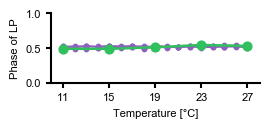

In [116]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for ss in all_ss_reshape[:-5]:
        all_LP_phases = ss[:,13]
        ax.plot(temp_vec-272, all_LP_phases, c=col['CONSISTENT1'], lw=0.8)
        ax.scatter(temp_vec-272, all_LP_phases, color=col['CONSISTENT1'], marker='o', s=10.0)
    ax.plot(np.asarray([283,287,291,295,299])-272, all_experimLP_phases, c=col['GT'], lw=1.8)
    ax.scatter(np.asarray([283,287,291,295,299])-272, all_experimLP_phases, color=col['GT'], marker='o', s=40.0, zorder=100)
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel('Phase of LP')
    ax.set_ylim(0,1)
    plt.xticks([11,15,19,23,27])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     plt.savefig(PANEL_X2, facecolor='None', transparent=True)
    plt.show()

In [117]:
all_experimPY_phases = np.asarray([summstats_experimental_11[14], summstats_experimental_15[14], summstats_experimental_19[14], summstats_experimental_23[14], summstats_experimental_27[14]])

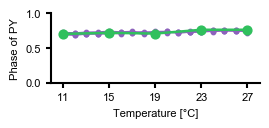

In [118]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for ss in all_ss_reshape[:-5]:
        all_LP_phases = ss[:,14]
        ax.plot(temp_vec-272, all_LP_phases, c=col['CONSISTENT1'], lw=0.8)
        ax.scatter(temp_vec-272, all_LP_phases, color=col['CONSISTENT1'], marker='o', s=10.0)
    ax.plot(np.asarray([283,287,291,295,299])-272, all_experimPY_phases, c=col['GT'], lw=1.8)
    ax.scatter(np.asarray([283,287,291,295,299])-272, all_experimPY_phases, color=col['GT'], marker='o', s=40.0, zorder=100)
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel('Phase of PY')
    ax.set_ylim(0,1)
    plt.xticks([11,15,19,23,27])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     plt.savefig(PANEL_X3, facecolor='None', transparent=True)
    plt.show()

# Assemble figure

In [119]:
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [62]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#D73789'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

plot_panelA = True
plot_panelB = True
plot_panelC = False
plot_panelD = True
plot_panelE = True

f = Figure('20.3cm', '13.7cm',

           
    Panel(
          SVG(PANEL_A1).scale(svg_scale).move(0, 15*factor_svg),
          Text("a", 0*factor_svg, 15.5*factor_svg, **kwargs_text),
        Text("11°C", 10*factor_svg, 16.0*factor_svg, **kwargs_text8pt),
    ).move(2*factor_svg, -13.0*factor_svg),

    Panel(
          SVG(PANEL_A2).scale(svg_scale).move(0, 15*factor_svg),
        Text("15°C", 10*factor_svg, 16*factor_svg, **kwargs_text8pt),
    ).move(30*factor_svg, -13.5*factor_svg),

    Panel(
          SVG(PANEL_A3).scale(svg_scale).move(0, 15*factor_svg),
        Text("19°C", 10*factor_svg, 16*factor_svg, **kwargs_text8pt),
    ).move(58*factor_svg, -13.5*factor_svg),

    Panel(
          SVG(PANEL_A4).scale(svg_scale).move(0, 15*factor_svg),
        Text("23°C", 10*factor_svg, 16*factor_svg, **kwargs_text8pt),
    ).move(86*factor_svg, -13.5*factor_svg),

    Panel(
          SVG(PANEL_A5).scale(svg_scale).move(0, 15*factor_svg),
        Text("27°C", 10*factor_svg, 16*factor_svg, **kwargs_text8pt),
    ).move(114*factor_svg, -13.5*factor_svg),

    Panel(
          SVG(PANEL_B1).scale(svg_scale).move(0, 0*factor_svg),
          Text("b", 0*factor_svg, 2.5*factor_svg, **kwargs_text),
    ).move(0*factor_svg, 23*factor_svg),

    Panel(
          SVG(PANEL_B2).scale(svg_scale).move(0, 0*factor_svg),
    ).move(28*factor_svg, 23*factor_svg),

    Panel(
          SVG(PANEL_B3).scale(svg_scale).move(0, 0*factor_svg),
    ).move(56*factor_svg, 23*factor_svg),

    Panel(
          SVG(PANEL_B4).scale(svg_scale).move(0, 0*factor_svg),
    ).move(84*factor_svg, 23*factor_svg),

    Panel(
          SVG(PANEL_B5).scale(svg_scale).move(0, 0*factor_svg),
    ).move(112*factor_svg, 23*factor_svg),

    Panel(
          SVG(PANEL_D1).scale(svg_scale).move(0, 0*factor_svg),
          Text("c", 0*factor_svg, 2.5*factor_svg, **kwargs_text),
    ).move(0*factor_svg, 53*factor_svg),

    Panel(
          SVG(PANEL_D2).scale(svg_scale).move(0, 0*factor_svg),
    ).move(28*factor_svg, 53*factor_svg),

    Panel(
          SVG(PANEL_D3).scale(svg_scale).move(0, 0*factor_svg),
    ).move(56*factor_svg, 53*factor_svg),

    Panel(
          SVG(PANEL_D4).scale(svg_scale).move(0, 0*factor_svg),
    ).move(84*factor_svg, 53*factor_svg),

    Panel(
          SVG(PANEL_D5).scale(svg_scale).move(0, 0*factor_svg),
    ).move(112*factor_svg, 53*factor_svg),
           
    
    #Panel(
    #      SVG(PANEL_D1).scale(svg_scale).move(0, 0*factor_svg),
    #).move(0*factor_svg, 88*factor_svg),

    #Panel(
    #      SVG(PANEL_D2).scale(svg_scale).move(0, 0*factor_svg),
    #).move(28*factor_svg, 88*factor_svg),

    #Panel(
    #      SVG(PANEL_D3).scale(svg_scale).move(0, 0*factor_svg),
    #).move(56*factor_svg, 88*factor_svg),

    #Panel(
    #      SVG(PANEL_D4).scale(svg_scale).move(0, 0*factor_svg),
    #).move(84*factor_svg, 88*factor_svg),

    #Panel(
    #      SVG(PANEL_D5).scale(svg_scale).move(0, 0*factor_svg),
    #).move(112*factor_svg, 88*factor_svg),
           
    Panel(
          SVG(PANEL_X1).scale(svg_scale).move(0, 15*factor_svg),
        Text("d", 0*factor_svg, 15.0*factor_svg, **kwargs_text),
    ).move(0*factor_svg, 59*factor_svg),

    Panel(
          SVG(PANEL_X2).scale(svg_scale).move(0, 15*factor_svg),
    ).move(47*factor_svg, 59*factor_svg),

    Panel(
          SVG(PANEL_X3).scale(svg_scale).move(0, 15*factor_svg),
    ).move(94*factor_svg, 59*factor_svg),
)

!mkdir -p fig
f.save("fig/fig6.svg")
svg('fig/fig6.svg')

In [ ]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#D73789'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

plot_panelA = True
plot_panelB = True
plot_panelC = False
plot_panelD = True
plot_panelE = True

f = Figure('20.3cm', '13.7cm',

           
    Panel(
          SVG(PANEL_A1).scale(svg_scale).move(0, 15*factor_svg),
          Text("a", 0*factor_svg, 15.5*factor_svg, **kwargs_text),
        Text("11°C", 10*factor_svg, 16.0*factor_svg, **kwargs_text8pt),
    ).move(2*factor_svg, -13.0*factor_svg),

    Panel(
          SVG(PANEL_A2).scale(svg_scale).move(0, 15*factor_svg),
        Text("15°C", 10*factor_svg, 16*factor_svg, **kwargs_text8pt),
    ).move(30*factor_svg, -13.5*factor_svg),

    Panel(
          SVG(PANEL_A3).scale(svg_scale).move(0, 15*factor_svg),
        Text("19°C", 10*factor_svg, 16*factor_svg, **kwargs_text8pt),
    ).move(58*factor_svg, -13.5*factor_svg),

    Panel(
          SVG(PANEL_A4).scale(svg_scale).move(0, 15*factor_svg),
        Text("23°C", 10*factor_svg, 16*factor_svg, **kwargs_text8pt),
    ).move(86*factor_svg, -13.5*factor_svg),

    Panel(
          SVG(PANEL_A5).scale(svg_scale).move(0, 15*factor_svg),
        Text("27°C", 10*factor_svg, 16*factor_svg, **kwargs_text8pt),
    ).move(114*factor_svg, -13.5*factor_svg),

    Panel(
          SVG(PANEL_B1).scale(svg_scale).move(0, 0*factor_svg),
          Text("b", 0*factor_svg, 0.5*factor_svg, **kwargs_text),
        Text("11°C", 11*factor_svg, 0.5*factor_svg, **kwargs_text8pt),
    ).move(0*factor_svg, 25*factor_svg),

    Panel(
          SVG(PANEL_B2).scale(svg_scale).move(0, 0*factor_svg),
        Text("11°C+15°C", 9*factor_svg, 0.5*factor_svg, **kwargs_text8pt),
    ).move(27.75*factor_svg, 25*factor_svg),

    Panel(
          SVG(PANEL_B3).scale(svg_scale).move(0, 0*factor_svg),
        Text("11°C+15°C+19°C", 7*factor_svg, 0.5*factor_svg, **kwargs_text8pt),
    ).move(55.5*factor_svg, 25*factor_svg),

    Panel(
          SVG(PANEL_B4).scale(svg_scale).move(0, 0*factor_svg),
        Text("11°C+15°C+19°C+23°C", 5*factor_svg, 0.5*factor_svg, **kwargs_text8pt),
    ).move(83.25*factor_svg, 25*factor_svg),

    Panel(
          SVG(PANEL_B5).scale(svg_scale).move(0, 0*factor_svg),
        Text("11°C+15°C+19°C+23°C+27°C", 3*factor_svg, 0.5*factor_svg, **kwargs_text8pt),
    ).move(111*factor_svg, 25*factor_svg),

    Panel(
          SVG(PANEL_D1).scale(svg_scale).move(0, 0*factor_svg),
          Text("c", 0*factor_svg, 2.5*factor_svg, **kwargs_text),
    ).move(0*factor_svg, 53*factor_svg),

    Panel(
          SVG(PANEL_D2).scale(svg_scale).move(0, 0*factor_svg),
    ).move(28*factor_svg, 53*factor_svg),

    Panel(
          SVG(PANEL_D3).scale(svg_scale).move(0, 0*factor_svg),
    ).move(56*factor_svg, 53*factor_svg),

    Panel(
          SVG(PANEL_D4).scale(svg_scale).move(0, 0*factor_svg),
    ).move(84*factor_svg, 53*factor_svg),

    Panel(
          SVG(PANEL_D5).scale(svg_scale).move(0, 0*factor_svg),
    ).move(112*factor_svg, 53*factor_svg),
           
    
    #Panel(
    #      SVG(PANEL_D1).scale(svg_scale).move(0, 0*factor_svg),
    #).move(0*factor_svg, 88*factor_svg),

    #Panel(
    #      SVG(PANEL_D2).scale(svg_scale).move(0, 0*factor_svg),
    #).move(28*factor_svg, 88*factor_svg),

    #Panel(
    #      SVG(PANEL_D3).scale(svg_scale).move(0, 0*factor_svg),
    #).move(56*factor_svg, 88*factor_svg),

    #Panel(
    #      SVG(PANEL_D4).scale(svg_scale).move(0, 0*factor_svg),
    #).move(84*factor_svg, 88*factor_svg),

    #Panel(
    #      SVG(PANEL_D5).scale(svg_scale).move(0, 0*factor_svg),
    #).move(112*factor_svg, 88*factor_svg),
           
    Panel(
          SVG(PANEL_X1).scale(svg_scale).move(0, 15*factor_svg),
        Text("d", 0*factor_svg, 15.0*factor_svg, **kwargs_text),
    ).move(0*factor_svg, 59*factor_svg),

    Panel(
          SVG(PANEL_X2).scale(svg_scale).move(0, 15*factor_svg),
    ).move(47*factor_svg, 59*factor_svg),

    Panel(
          SVG(PANEL_X3).scale(svg_scale).move(0, 15*factor_svg),
    ).move(94*factor_svg, 59*factor_svg),
)

!mkdir -p fig
f.save("fig/fig6.svg")
svg('fig/fig6.svg')